## Cálculo del rendimiento de un portafolio de valores

Inicialmente cargamos los dosts de un portafolio de 5 acciones - British Petroleum, Ford, Exxon, Lincoln, y Apple *(archivo: 5_stocks_2000_2017.csv)*.

In [25]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [26]:
misdatos = pd.read_csv('C:/Users/Mario/Finanzas Python/5_stocks_2000_2017.csv', index_col = 'Date')

In [27]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 1999-12-31 to 2017-12-12
Data columns (total 5 columns):
BP      4517 non-null float64
F       4517 non-null float64
XOM     4517 non-null float64
LNC     4517 non-null float64
AAPL    4517 non-null float64
dtypes: float64(5)
memory usage: 211.7+ KB


In [28]:
misdatos.head()

BP          F        XOM        LNC      AAPL
Date                                                            
1999-12-31  26.942526  17.911160  25.595554  27.138775  3.291592
2000-01-03  26.715410  17.596191  24.880707  26.502689  3.583733
2000-01-04  26.573452  17.008251  24.404148  25.739405  3.281587
2000-01-05  27.481936  17.071245  25.734549  24.848928  3.329610
2000-01-06  27.538712  17.092241  27.064951  25.303717  3.041471

In [29]:
misdatos.tail()

BP        F        XOM        LNC        AAPL
Date                                                            
2017-12-06  39.580002  12.3800  82.279999  76.500000  169.009995
2017-12-07  39.310001  12.5300  82.550003  77.589996  169.320007
2017-12-08  39.639999  12.6100  82.660004  78.540001  169.369995
2017-12-11  39.930000  12.5800  83.029999  77.169998  172.669998
2017-12-12  40.709999  12.5242  83.313904  77.559998  172.059998

### Normalizando a 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalizamos a cien y después graficamos (podemos aplicar .loc() o bien .iloc()). 

In [30]:
misdatos.iloc[0]

BP      26.942526
F       17.911160
XOM     25.595554
LNC     27.138775
AAPL     3.291592
Name: 1999-12-31, dtype: float64

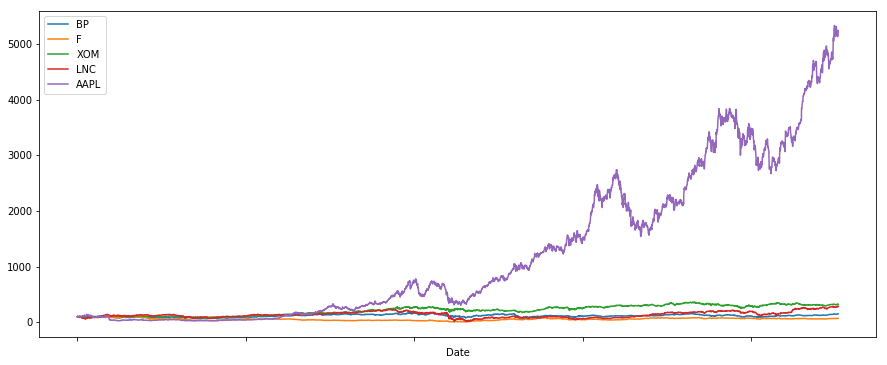

In [31]:
(misdatos / misdatos.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

Viendo el gráfico, nos podemos dar una idea sobre como podemos armar un portafolio con un buen rendimiento.

*****

### Cálculo del rendimiento 

Obtenemos inicialmente el cálculo del retorno o rendimiento simple y se guarda en una tabla.

In [32]:
returns = (misdatos / misdatos.shift(1)) - 1
returns.head()

BP         F       XOM       LNC      AAPL
Date                                                        
1999-12-31       NaN       NaN       NaN       NaN       NaN
2000-01-03 -0.008430 -0.017585 -0.027929 -0.023438  0.088754
2000-01-04 -0.005314 -0.033413 -0.019154 -0.028800 -0.084310
2000-01-05  0.034188  0.003704  0.054515 -0.034596  0.014634
2000-01-06  0.002066  0.001230  0.051697  0.018302 -0.086538

Asumimos que se creo un portafolio con el mismo peso o importancia del index. Creamos el nuevo array llamándolo pesos.

In [33]:
pesos = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtenemos el retorno anual de cada una de las acciones y posteriormente calculamos el producto de esos redimientos y los pesos.

In [34]:
anual = returns.mean() * 250
anual

BP      0.062602
F       0.070093
XOM     0.094579
LNC     0.198599
AAPL    0.309165
dtype: float64

In [35]:
np.dot(anual, pesos)

0.14700757535575668

Transformamos el resultado en porcentaje. 

In [36]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.701 %


¿Es este rendimiento satisfactorio?